In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [24]:
#Define constants
T=1
M=100
N=1000

#a func, a+ and a-
def simple_a(x):
    return np.array((x-1/3)*(x-2/3))

def pos_a(x):
    a_vec=simple_a(x)
    null_vec=np.zeros(len(x))
    arr=np.maximum(null_vec, a_vec)
    return arr

def neg_a(x):
    null_vec=np.zeros(len(x))
    a_vec=-simple_a(x)
    arr=np.maximum(null_vec, a_vec)
    return arr

#Matrix creator
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

#Plot func
def plot_solutionTest(U, angle=-30, title="Title"):
    x_len = len(U[:, ])
    t_len = len(U[0])
    
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), subplot_kw={"projection": "3d"})
    tt, xx = np.meshgrid(t, x)
    ax.plot_surface(tt, xx, U, cmap=cm.coolwarm)
    ax.view_init(azim=angle)              # Rotate the figure
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('u')
    fig.tight_layout()

#RHS for testing
def RHS(tt, xx):
    t, x = np.meshgrid(tt, xx)
    return 2*np.pi*simple_a(x)*np.cos(2*np.pi*x)*np.exp(-t**2) - 2*t*np.sin(2*np.pi*x)*np.exp(-t**2)

#Exact solution for testing
def v_exact_func(t, x):  
    return np.sin(2*np.pi*x)*np.exp(-t**2)

#t=0 with a RHS, u_0(x)
def init_test(x):
    return v_exact_func(0, x)  #np.sin(2*np.pi*x)

def bc_1(t, u_init):
    return v_exact_func(t, 0)

#Some more tests
def RHS2(tt, xx):
    t ,x =np.meshgrid(tt, xx)
    return -2*np.pi*simple_a(x)*np.sin(2*np.pi*x)*np.exp(-t**2) - 2*t*np.cos(2*np.pi*x)*np.exp(-t**2)

def v_exact_func2(t, x):  
    return np.cos(2*np.pi*x)*np.exp(-t**2)

def init_test2(x):
    return v_exact_func2(0, x)

def bc_2(t, u_init):
    return v_exact_func(t, 0)

def RHS3(tt, xx):
    t ,x =np.meshgrid(tt, xx)
    return -2*np.exp(-2*(x+t)) -2*simple_a(x)*np.exp(-2*(x+t))

def v_exact_func3(t, x):  
    return np.exp(-2*(x+t))

def init_test3(x):
    return v_exact_func3(0, x)

def bc_3(t, u_init):
    return v_exact_func3(t, 0)

In [28]:
#t=0 without a RHS, u_0(x)
def init_noRHS(x):
    return np.exp(-x)*np.sin(2*np.pi*(x-simple_a(x)))#np.exp(-(x))

#Boundary x=0
def bc_noRHS(t, init):
    return np.exp(-2*t) #init_test(simple_a(np.zeros(N+1))*t)    #WHAT??????????

#Scheme
def upwind(M, T, N, u_init, u_bc, RHS_func=lambda t, x:np.zeros((len(x), len(t)))):
    
    h=1/M
    k=T/N
    
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))

    U[:, 0]=u_init(x)
    g=u_bc(t, u_init)
    U[0, :]=g
    
    lower=(k/h)*pos_a(x)[1:]
    middle=np.ones(len(x))-(k/h)*pos_a(x)[:]-(k/h)*neg_a(x)[:]
    upper=(k/h)*neg_a(x)[:-1]
    
    A=tridiag(lower, middle, upper)

    CFL=k/h*simple_a(x)    
    F=RHS_func(t, x)
    
    q=np.zeros(M+1)
    
    for n in range(N):
        q[0]=U[0, n]*pos_a(x)[1]
        U[:, n+1]=A@U[:, n] + k*F[:, n] #+ k/h*q
        #U[0, n+1]=pos_a(x)[1]*U[0, n]
        U[0, n+1]=u_bc(t[n], u_init) 
    

    return U, CFL

'\nplt.figure()\nplt.plot(test3[:, 0], label="t=0")\nplt.plot(v_exact3[:, 0])\nplt.legend()\nplt.figure()\nplt.plot(test3[0, :], label="x=0")\nplt.plot(v_exact3[0, :])\nplt.legend()\n'

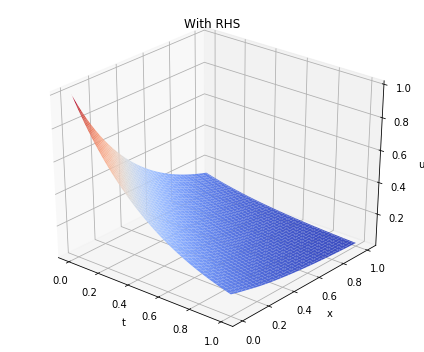

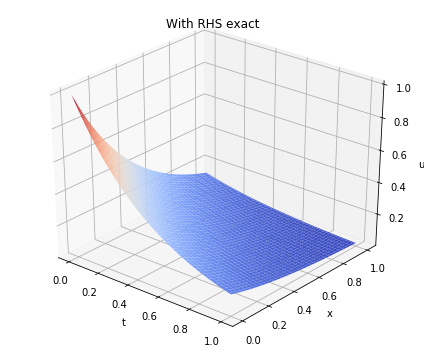

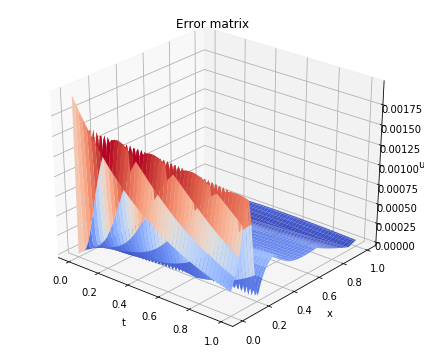

In [29]:
test3, CFL3=upwind(M, T, N, init_test3, bc_3, RHS3)
#Exact solution
xxx=np.linspace(0, 1, M+1)   
ttt=np.linspace(0, T, N+1)
tt, xx = np.meshgrid(ttt,xxx)
v_exact3 = v_exact_func3(tt,xx)

plot_solutionTest(test3, angle=-50, title="With RHS")
plot_solutionTest(v_exact3, angle=-50, title="With RHS exact")
plot_solutionTest(np.abs(test3-v_exact3), angle=-50, title="Error matrix")

'''
plt.figure()
plt.plot(test3[:, 0], label="t=0")
plt.plot(v_exact3[:, 0])
plt.legend()
plt.figure()
plt.plot(test3[0, :], label="x=0")
plt.plot(v_exact3[0, :])
plt.legend()
'''

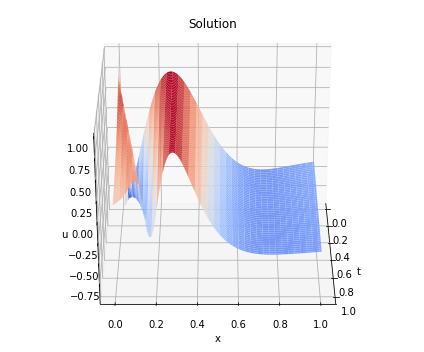

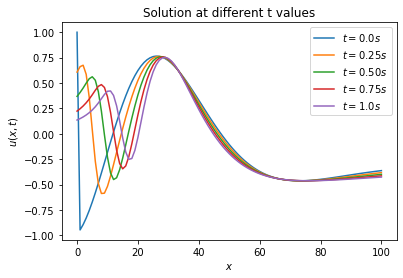

0.010819983471195074


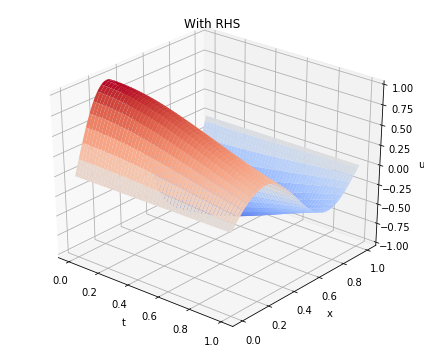

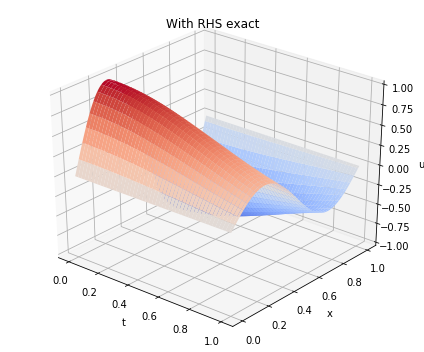

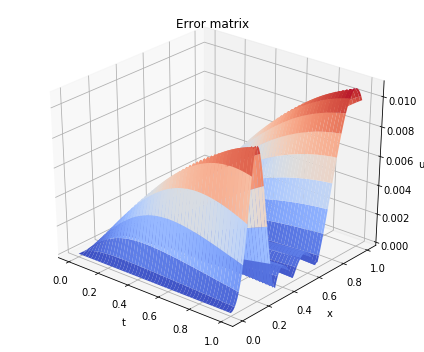

In [34]:
#Analytic solution
noRHS, noRHSCFL=upwind(M, T, N, init_noRHS, bc_noRHS)
plot_solutionTest(noRHS, angle=-0, title="Solution")

#Fix different t values and see a plot of developement in x
plt.figure()
plt.title("Solution at different t values")
plt.plot(noRHS[:, 0], label=r'$t=0.0s$')
plt.plot(noRHS[:, int(N*1/4)], label=r'$t=0.25s$')
plt.plot(noRHS[:, int(N*1/2)], label=r'$t=0.50s$')
plt.plot(noRHS[:, int(N*3/4)], label=r'$t=0.75s$')
plt.plot(noRHS[:, -1], label=r'$t=1.0s$')
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x, t)$')
plt.legend()
plt.show()

#Solved with known exact solution
with_RHS, CFL=upwind(M, T, N, init_test, bc_1, RHS)

#Exact solution
xxx=np.linspace(0, 1, M+1)   
ttt=np.linspace(0, T, N+1)
tt, xx = np.meshgrid(ttt,xxx)
v_exact = v_exact_func(tt,xx)

plot_solutionTest(with_RHS, angle=-50, title="With RHS")
plot_solutionTest(v_exact, angle=-50, title="With RHS exact")

#Error plot
plot_solutionTest(np.abs(v_exact-with_RHS), angle=-50, title="Error matrix")
print(np.max(np.abs(v_exact-with_RHS)))

In [ ]:
#Define an error function for a given method
def error_func_h(u_exact_method):
    Ms=np.arange(2,20,1)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error= np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric, temp1 = upwind(Ms[i], T, N, init_test, bc_test, RHS)
        x = np.linspace(0, 1, Ms[i]+1)
        tt, xx = np.meshgrid(t,x)
        u_exact = u_exact_method(tt, xx)
        error[i] = np.max( np.abs(u_numeric[-1,:] - u_exact[-1,:] ))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order

hs, error, order = error_func_h(v_exact_func)

print(order)

In [ ]:
plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=1$', fontsize=20)
plt.loglog(hs, error,'o-', linestyle='-', color="lime", label="Upwind")
plt.loglog(hs, hs, label=r'$Ch$')
plt.legend(fontsize=15)
plt.show()

In [ ]:
def error_func_k(u_exact_func):
    Ns=np.arange(2, 1000, 10)
    ks=1/Ns
    x=np.linspace(0, 1, M+1)
    error=np.zeros(len(ks))
    for i in range(len(Ns)):
        u_numeric, temp1= upwind(M, T, Ns[i], init_test, bc_test, RHS)
        t=np.linspace(0, T, Ns[i]+1)
        tt, xx = np.meshgrid(t,x)
        u_exact = u_exact_func(tt, xx)
        error[i] = np.max(np.abs(u_numeric[:, -1] - u_exact[:, -1]))
    order=np.polyfit(np.log(ks), np.log(error), 1)[0]
    return ks, error, order
        
ks, error_k, order_k = error_func_k(v_exact_func)

print(order_k)